In [16]:
import os
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
FILE_PATH = "./data/task3/camera_module_calibration_task3.csv"

FIGURES_FOLDER = "./figures/task_3/"
if not os.path.exists(FIGURES_FOLDER):
    os.makedirs(FIGURES_FOLDER)

In [14]:
col_names = ["distance", "height"]
df = pd.read_csv(FILE_PATH, header=None, names=col_names)

df["1/height"] = 1 / df["height"]

inv_h_array = df["1/height"].values
dist_array = df["distance"].values

In [22]:
class LinearReg1D:
    def __init__(self):
        self.bias = None
        self.slope = None
    
    def fit(self, x, y):
        '''
        Fit the weights of linear regression for 1d data
        :param x: 1d np.array of x data
        :param y: 1d np.array of y data
        '''
        self.slope, self.bias, _, _, _ = scipy.stats.linregress(x=x, y=y)
    
    def predict(self, x):
        '''
        Make prediction
        :param x: 1d np.array of x data
        '''
        y_hat = self.bias + self.slope * x
        return y_hat

In [23]:
linreg = LinearReg1D()
linreg.fit(x=inv_h_array, y=dist_array)
dist_pred_array = linreg.predict(inv_h_array)

In [34]:
print("b =", linreg.bias, ", m =", linreg.slope)

b = -2.9171410512195166 , m = 6285.2017183906255


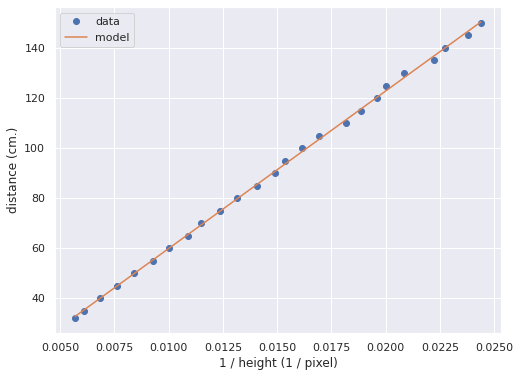

In [28]:
plt.figure(figsize=(8,6))
plt.plot(inv_h_array, dist_array, "o", label="data")
plt.plot(inv_h_array, dist_pred_array, "-", label="model")
plt.xlabel("1 / height (1 / pixel)")
plt.ylabel("distance (cm.)")
plt.legend()
plt.savefig(FIGURES_FOLDER + "task_3_lr.pdf")
plt.show()

In [31]:
h0 = 11.5
f = linreg.slope / h0
print(f)

546.5392798600544
